# Подготовка к работе

In [383]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [384]:
df = pd.read_csv('video-game-sales.csv', sep=',', low_memory=False)
df['User_Score'] = df['User_Score'].apply(lambda x: x if str(x).replace('.','',1).isdigit() else np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'])
df = df.query("Year_of_Release not in [2017, 2020]") # за 2017 год 3 игры, за 2020 1 игра
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   Publisher        16661 non-null  object 
 5   NA_Sales         16715 non-null  float64
 6   EU_Sales         16715 non-null  float64
 7   JP_Sales         16715 non-null  float64
 8   Other_Sales      16715 non-null  float64
 9   Global_Sales     16715 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10095 non-null  object 
 15  Rating           9949 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.2+ MB


# Визуализация

## Признаки

### Рейтинг

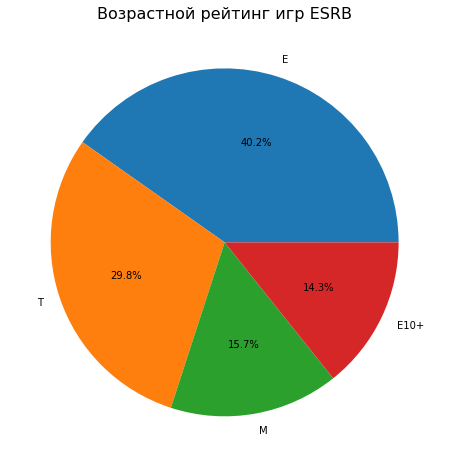

In [387]:
df['Rating'] = df.Rating.str.replace('EC', 'E').replace('K-A', 'E').replace('AO', 'M').apply(lambda x: x if x != 'RP' else np.nan)
plt.figure(figsize=(14, 8))
pie = df['Rating'].value_counts().plot.pie(autopct='%1.1f%%')
pie.set_title("Возрастной рейтинг игр ESRB", fontsize=16)
pie.set_ylabel("")
plt.show()

### Жанр

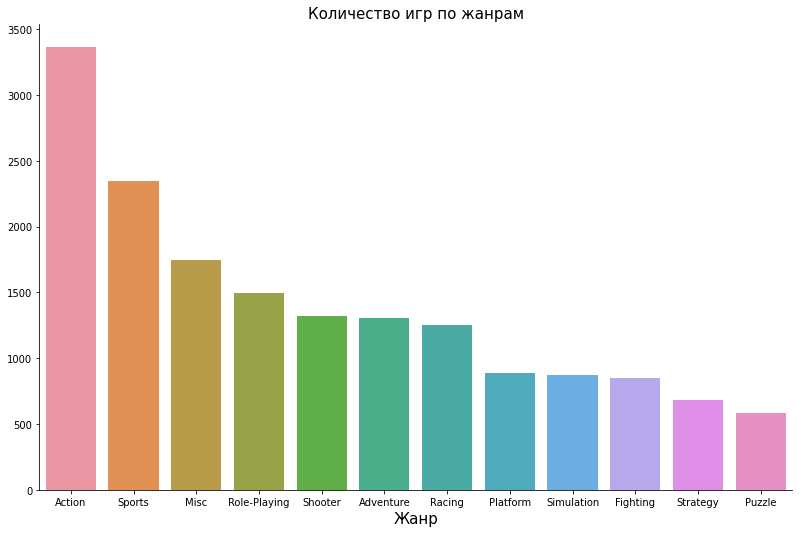

In [388]:
genres = pd.DataFrame(df['Genre'].value_counts())
genres.T

gplot = sns.catplot(data=df, kind='count', x='Genre', order=genres.T, height=7, aspect=1.6)
plt.title('Количество игр по жанрам', fontsize=15)
plt.ylabel('')
plt.xlabel('Жанр', fontsize=15)
plt.show()

### Оценки

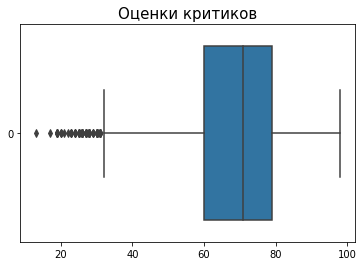

In [389]:
csplot = sns.boxplot(data=df['Critic_Score'], orient='h')
plt.title('Оценки критиков', fontsize=15)
plt.ylabel('')
plt.xlabel('')
plt.show()

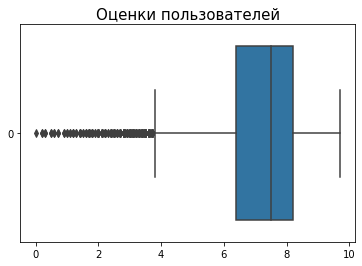

In [390]:
ucplot = sns.boxplot(data=df['User_Score'], orient='h')
plt.title('Оценки пользователей', fontsize=15)
plt.ylabel('')
plt.xlabel('')
plt.show()

## Корреляция признаков

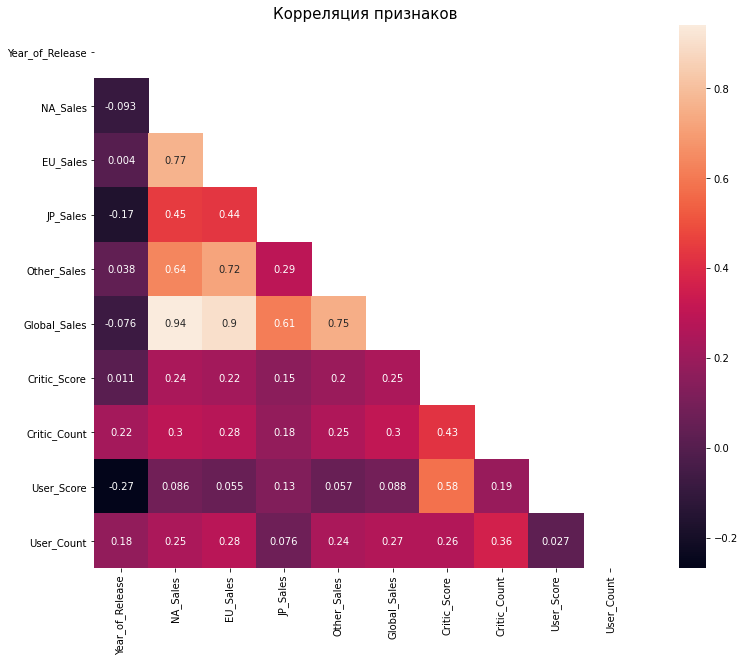

In [391]:
corr = df.corr()

mask = np.triu(corr)
plt.figure(figsize=(15,10))
corplot = sns.heatmap(d, annot=True, square=True, mask=mask)
plt.title('Корреляция признаков', fontsize=15)
plt.show()

# Взаимодействие признаков

## Количественный - Количественный

### Продажи/оценки игр от Nintendo и остальных

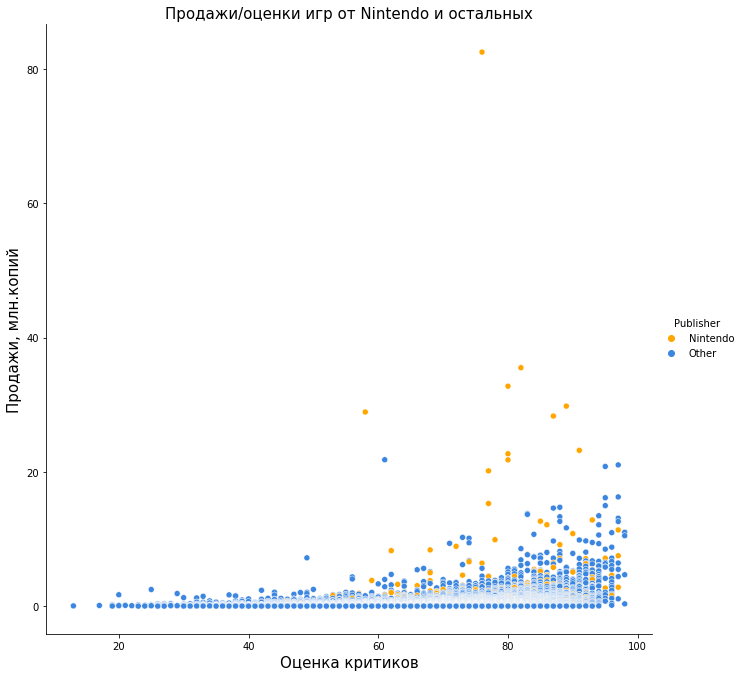

In [392]:
scores = df[['Global_Sales', 'Critic_Score', 'Publisher']]
mask = scores.isna().sum(axis=1).apply(lambda x: False if x>0 else True)
scores = scores[mask]
scores['Publisher'] = scores['Publisher'].apply(lambda x: x if x == 'Nintendo' else 'Other')

scplot = sns.relplot(data=scores, x='Critic_Score', y='Global_Sales', height=9, hue='Publisher', palette=['#FFA600', '#3C86E0'])
plt.title('Продажи/оценки игр от Nintendo и остальных', fontsize=15)
plt.ylabel('Продажи, млн.копий', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=15)
plt.show()

## Количественный - Категориальный

### Количество выпущенных игр в год

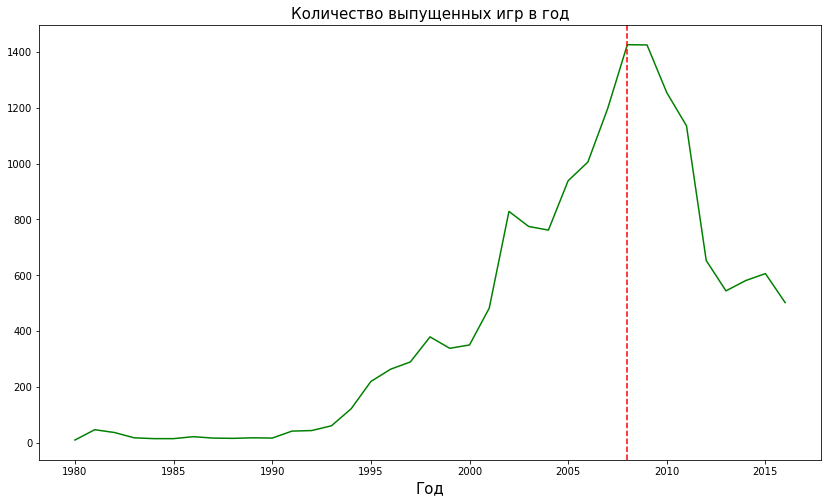

In [393]:
total_buy = df.groupby('Year_of_Release').count()

plt.figure(figsize=(14,8))
tplot = plt.plot(total_buy.index, total_buy['Name'], c='green')
plt.title('Количество выпущенных игр в год', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.axvline(2008, 0, 1, linestyle='--', c='r')
plt.show()

### Продажи 6 крупнейших издателей в год

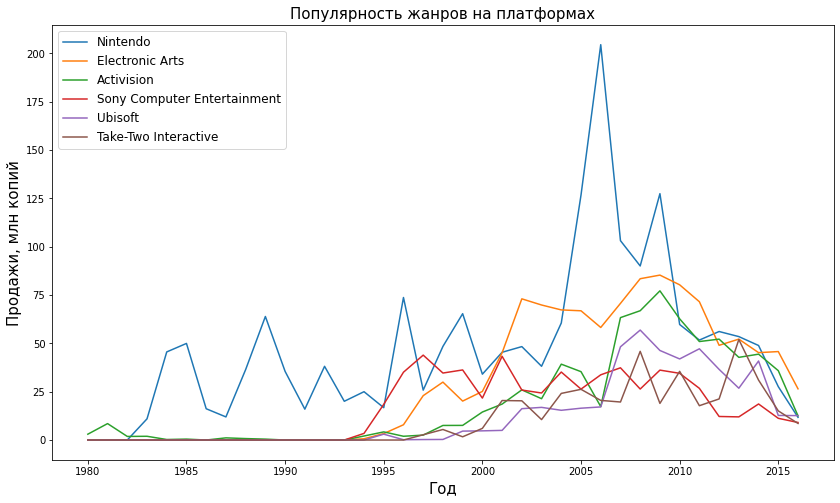

In [394]:
earn = df.groupby(['Publisher', 'Year_of_Release'])['Global_Sales'].sum().unstack(level=1, fill_value=0)
earn['Total']= earn.sum(axis=1)
earn = earn.sort_values(by='Total', ascending=False).drop('Total', 1).head(6)

plt.figure(figsize=(14,8))
eplot = plt.plot(earn.T)
plt.legend(earn.index, fontsize=12)
plt.title('Популярность жанров на платформах', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.show()

## Категориальный - Категориальный

### Популярность жанров на платформах

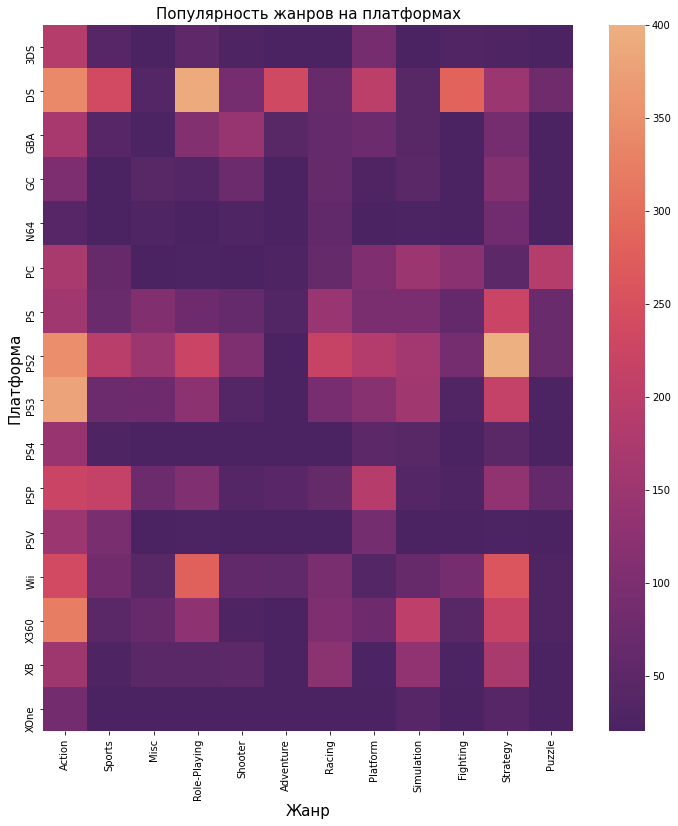

In [395]:
plat_genre = df.groupby(['Platform', 'Genre'])['Name'].count().unstack(level=1, fill_value=0)
plat_genre['Summary'] = plat_genre.sum(axis=1)
plat_genre = plat_genre[plat_genre['Summary'] > 0.0145 * df['Name'].count().sum()] # удаление "мёртвых" платформ
plat_genre.drop('Summary', 1, inplace=True)

genres = pd.DataFrame(df['Genre'].value_counts())
genres['Rang'] = np.linspace(0, 11, 12)
plat_genre.columns=genres.index
plat_genre

plt.figure(figsize=(13,13))
pal = sns.color_palette("flare_r", as_cmap=True)
pgplot = sns.heatmap(plat_genre, vmin=20, square=True, cmap = pal)
plt.title('Популярность жанров на платформах', fontsize=15)
plt.ylabel('Платформа', fontsize=15)
plt.xlabel('Жанр', fontsize=15)
plt.show()